# Visualização de Dados
## Atividade prática

Nome:  Amanda Raiza do Amaral Vieira

RGM: 33398054

Instituição: Cruzeiro do Sul Virtual

Curso: Ciência da Computação


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

O dataset conta com dados de batidas de carros de 2003 a 2015 no condade de Monroe County, EUA.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaalexandre/cruzeiro-do-sul-atividades/main/3_periodo/dataviz/monroe-county-car-crash-2003-2015.csv', encoding='latin-1')

In [ ]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [ ]:
df.rename(columns={
    "Year": "Ano",
    "Month": "Mês",
    "Day": "Dia",
    "Weekend?": "Fim de Semana?",
    "Hour": "Hora",
    "Collision Type": "Tipo de Colisão",
    "Injury Type": "Tipo de Lesão",
    "Primary Factor": "Fator Primário",
    "Reported_Location": "Localização Reportada",
    "Latitude": "Latitude",
    "Longitude": "Longitude"
}
, inplace=True)

In [66]:
df.head()

,Ano,Mês,Dia,Fim de Semana?,Hora,Tipo de Colisão,Tipo de Lesão,Fator Primário,Localização Reportada,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,15.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,23.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,9.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,11.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [65]:
#Formatando a hora

# Função para converter HHMM para horas decimais
def convert_to_decimal_hours(hhmm):
    hours = hhmm // 100
    minutes = hhmm % 100
    decimal_hours = hours + minutes / 60
    return decimal_hours

df['Hora'] = df['Hora'].apply(convert_to_decimal_hours)

<ipython-input-71-97e4dbdc09f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette=['skyblue', 'pink'])


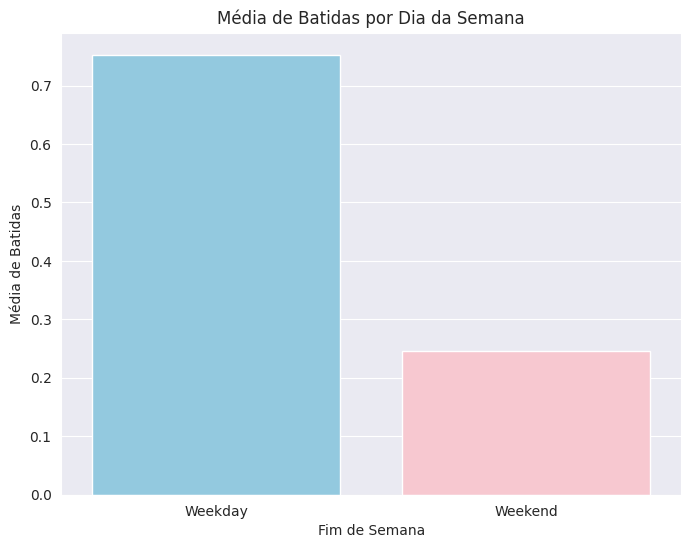

In [71]:
means = df.groupby('Fim de Semana?')['Fim de Semana?'].count() / len(df)

#Criando o histograma
plt.figure(figsize=(8, 6))
sns.barplot(x=means.index, y=means.values, palette=['skyblue', 'pink'])
plt.title('Média de Batidas por Dia da Semana')
plt.xlabel('Fim de Semana')
plt.ylabel('Média de Batidas')
plt.show()

Aqui vemos que a maioria dos acidentes ocorrem nos dias de semana.

In [46]:
#Contando os acidentes por anos
cont_ano = df['Ano'].value_counts()
cont_ano.sort_index()

Ano
2003    4625
2004    4269
2005    3967
2006    3937
2007    4055
2008    4341
2009    4014
2010    4060
2011    3914
2012    4223
2013    4058
2014    4167
2015    4313
Name: count, dtype: int64

In [48]:
#Contando os acidents por meses
cont_meses = df['Mês'].value_counts()
cont_meses.sort_index()

Mês
1     4665
2     4541
3     3842
4     4574
5     4212
6     3752
7     3820
8     4480
9     4994
10    5581
11    4884
12    4598
Name: count, dtype: int64

[Text(0.5, 1.0, 'Quantidade de acidentes por ano'),
 Text(0.5, 0, 'Ano'),
 Text(0, 0.5, 'Quantidade')]

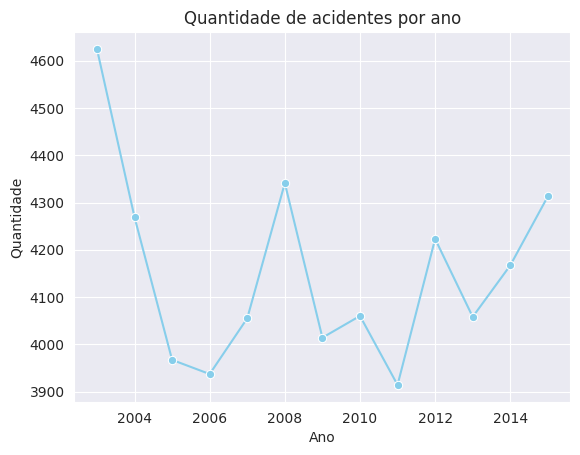

In [52]:
sns.lineplot(x=cont_ano.index, y=cont_ano.values, color='skyblue', marker='o').set(title='Quantidade de acidentes por ano', xlabel='Ano', ylabel='Quantidade')

Vemos que, ao longo dos anos, aconteceu uma queda brusca de acidentes em meados dos anos 2000, aumentou de novo no ano de 2008, só para cair e aumentar depois de 2013 em diante.

In [68]:
import numpy as np

# Cria uma tabela de contingência
contingency_table = pd.crosstab(df['Tipo de Colisão'], df['Tipo de Lesão'])
print(contingency_table)


Tipo de Lesão     Fatal  Incapacitating  No injury/unknown  Non-incapacitating
Tipo de Colisão                                                               
1-Car                49             205               7854                2137
2-Car                31             451              30807                6317
3+ Cars               5             116               1855                1176
Bus                   1               9                758                  82
Cyclist               0              50                 61                 357
Moped/Motorcycle     21             154                213                 619
Pedestrian            8             104                 49                 448


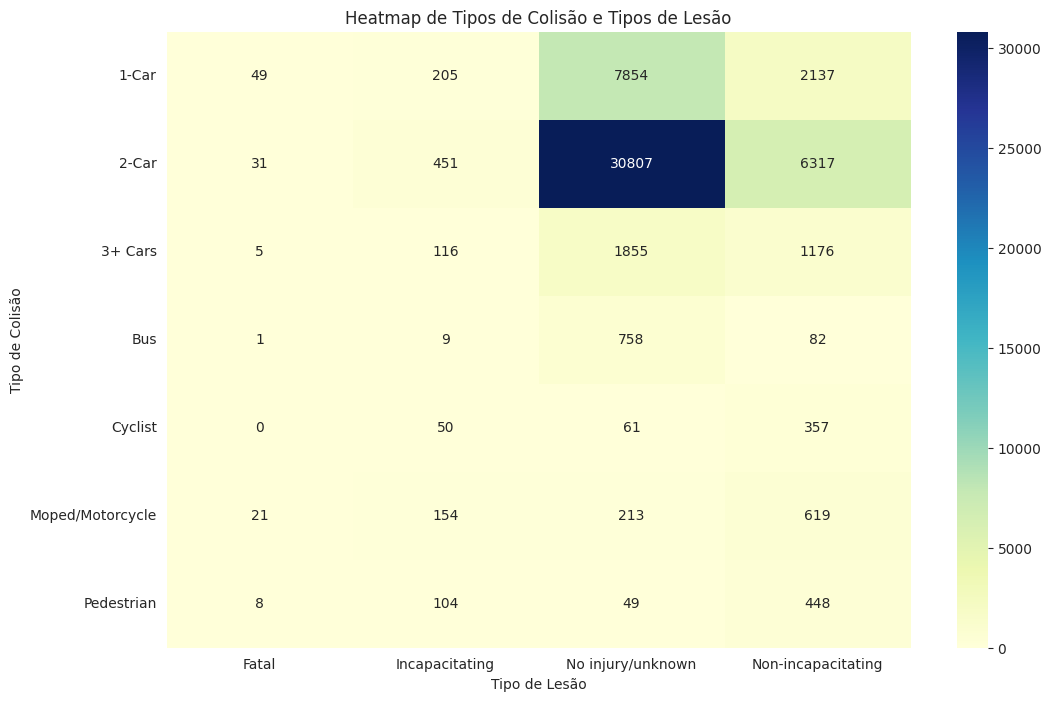

In [69]:
# Gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap de Tipos de Colisão e Tipos de Lesão')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Tipo de Colisão')
plt.show()